Привет, меня зовут Артем Хуршудов. Сегодня я проверю твой проект.
<br> Дальнейшее общение будет происходить на "ты" если это не вызывает никаких проблем.
<br> Желательно реагировать на каждый мой комментарий ('исправил', 'не понятно как исправить ошибку', ...)
<br> Пожалуйста, не удаляй комментарии ревьюера, так как они повышают качество повторного ревью.

Комментарии будут в <font color='green'>зеленой</font>, <font color='blue'>синей</font> или <font color='red'>красной</font> рамках:

<div class="alert alert-block alert-success">
<b>Успех:</b> Если все сделано отлично
</div>

<div class="alert alert-block alert-info">
<b>Совет: </b> Если можно немного улучшить
</div>

<div class="alert alert-block alert-danger">
<b>Ошибка:</b> Если требуются исправления. Работа не может быть принята с красными комментариями.
</div>

-------------------

Будет очень хорошо, если ты будешь помечать свои действия следующим образом:
<div class="alert alert-block alert-warning">
<b>Комментарий студента:</b> ...
</div>

<div class="alert alert-block alert-warning">
<b>Изменения:</b> Были внесены следующие изменения ...
</div>

### <font color='orange'>Общее впечатление</font>
* Большое спасибо за проделанную работу. Видно, что приложено много усилий.
* Выводы и рассуждения получились содержательными, их было интересно читать.
* Радует, что проект хорошо структурирован. Приятно проверять такие работы.
* Я оставил несколько советов. Пожалуйста, обрати на них внимание.
* Также проект требует небольших доработок. Однако, они не займут много времени.
* Жду новую версию проекта.

### <font color='orange'>Общее впечатление (ревью 2)</font>
* После изменений проект улучшился и может быть зачтен.
* Удачи в дальнейшем обучении и будущих работах!

# 1. Исследовательский анализ данных

In [19]:
import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [20]:
labels = pd.read_csv('/datasets/faces/labels.csv')
labels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7591 entries, 0 to 7590
Data columns (total 2 columns):
file_name    7591 non-null object
real_age     7591 non-null int64
dtypes: int64(1), object(1)
memory usage: 118.7+ KB


<div class="alert alert-block alert-success">
<b>Успех:</b> Данные загружены корректно.
</div>

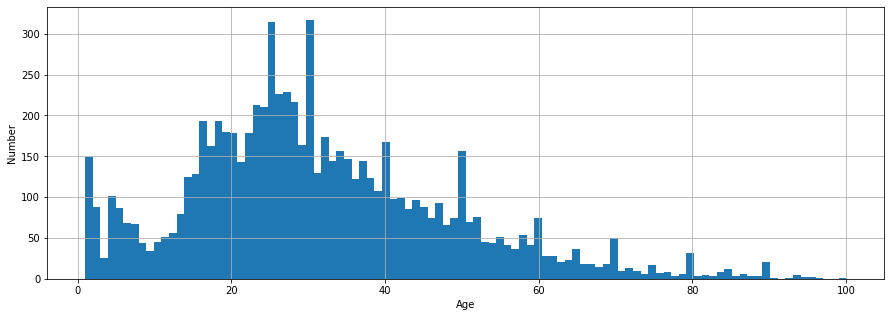

In [21]:
plt.figure(figsize=(15,5))
plt.hist(labels['real_age'], 100)
plt.xlabel('Age')
plt.ylabel('Number')
plt.grid()
plt.show()

<div class="alert alert-block alert-warning">
<b>Комментарий студента:</b> поработал над графиком
</div>

In [ ]:
labels = pd.read_csv('/datasets/faces/labels.csv')
train_datagen = ImageDataGenerator(rescale=1./255)
train_gen_flow = train_datagen.flow_from_dataframe(
        dataframe=labels,
        directory='/datasets/faces/final_files/',
        x_col='file_name',
        y_col='real_age',
        target_size=(224, 224),
        batch_size=32,
        class_mode='raw',
        seed=12345) 

In [ ]:
features, target = next(train_gen_flow)

In [ ]:
plt.figure(figsize=(10,10))
for i in range(12):
    plt.subplot(4,4, i+1)
    plt.imshow(features[i])
    plt.xticks([])
    plt.yticks([])
    plt.tight_layout()
plt.show()

<div class="alert alert-block alert-info">
<b>Совет: </b> Пожалуйста, сохраняй проект перед отправкой, я не вижу вывода изображений.
</div>

<div class="alert alert-block alert-info">
<b>Совет: </b> Желтаельно поработать над оформление графика (название осей и самого графика, а также размер). В названиях (title) изображений можно указать возраст.
</div>

Из гистограммы можем видеть, что чаще всего в выборке присутствуют люди 30 лет. Меньше всего - те, кому за 60 лет.

<div class="alert alert-block alert-warning">
<b>Комментарий студента:</b> описал график
</div>

Как можем видеть, изображения приведены к такому виду, что лица людей располагаются строго вертикально. Получается, что мы можем сделать вертикальное зеркальное отражение изображений для увеличения выборки, но мы не можем отражать горизонтально, а также менять углы изображений

<div class="alert alert-block alert-danger">
<b>Ошибка:</b> Проведи анализ гистограммы: каких возрастов много, каких мало.
    
</div>


# 2. Обучение модели

Перенесите сюда код обучения модели и её результат вывода на экран.


(Код в этом разделе запускается в отдельном GPU-тренажёре, поэтому оформлен не как ячейка с кодом, а как код в текстовой ячейке)

```python

import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet import ResNet50
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
 
 
def load_train(path):
    labels = pd.read_csv(path + 'labels.csv')
    train_datagen = ImageDataGenerator(
        validation_split=0.25,
        horizontal_flip=True,
        rescale=1./255)
    train_gen_flow = train_datagen.flow_from_dataframe(
        dataframe=labels,
        directory=path + 'final_files/',
        x_col='file_name',
        y_col='real_age',
        target_size=(224, 224),
        batch_size=16,
        class_mode='raw',
        subset='training',
        seed=12345)
 
    return train_gen_flow
 
def load_test(path):
    labels = pd.read_csv(path + 'labels.csv')
    test_datagen = ImageDataGenerator(
        validation_split=0.25,
        rescale=1./255)
    test_gen_flow = test_datagen.flow_from_dataframe(
        dataframe=labels,
        directory=path + 'final_files/',
        x_col='file_name',
        y_col='real_age',
        target_size=(224, 224),
        batch_size=16,
        class_mode='raw',
        subset='validation',
        seed=12345)
 
    return test_gen_flow
 
def create_model(input_shape):
    backbone = ResNet50(weights='imagenet',
                        input_shape=input_shape,
                        include_top=False)
 
    model = Sequential()
    model.add(backbone)
    model.add(GlobalAveragePooling2D())
    model.add(Dense(1, activation='relu'))
 
    optimizer = Adam(lr=0.0005)
    model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])
 
    return model
 
def train_model(model, train_data, test_data, batch_size=None, epochs=20,
                steps_per_epoch=None, validation_steps=None):
 
    if steps_per_epoch is None:
        steps_per_epoch = len(train_data)
    if validation_steps is None:
        validation_steps = len(test_data)
 
    model.fit(train_data,
              validation_data=test_data,
              batch_size=batch_size, epochs=epochs,
              steps_per_epoch=steps_per_epoch,
              validation_steps=validation_steps,
              verbose=2)
 
    return model

```

<div class="alert alert-block alert-success">
<b>Успех:</b> Модель определена корректно. Радует, что горизонтальный флип применен только на тренировочной части.
</div>

```

119/119 - 10s - loss: 97.5032 - mae: 7.3962
Test MAE: 7.3962

```

<div class="alert alert-block alert-info">
<b>Совет: </b> Желательно было выводить метрику и на треине и на тесте.
</div>

# 3. Анализ обученной модели

Получили значение метрики меньше 8. Неройная сеть, построенная на основе архитекуры ResNet достаточно неплохо будеть классифицировать возраст людей. В среднем ошибка будет составлять 7 лет, что достаточно неплохо

<div class="alert alert-block alert-success">
<b>Успех:</b> Итоговый анализ проведен неплохо.
</div>

# Чек-лист

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Исследовательский анализ данных выполнен
- [x]  Результаты исследовательского анализа данных перенесены в финальную тетрадь
- [x]  MAE модели не больше 8
- [x]  Код обучения модели скопирован в финальную тетрадь
- [x]  Результат вывода модели на экран перенесён в финальную тетрадь
- [x]  По итогам обучения модели сделаны выводы